In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("admission_data.csv")
df = df.rename({'GRE Score': 'GREScore', 'TOEFL Score': 'TOEFLScore', 'University Rating':'UniversityRating','Chance of Admit ':'ChanceofAdmit'}, axis=1)

<AxesSubplot:>

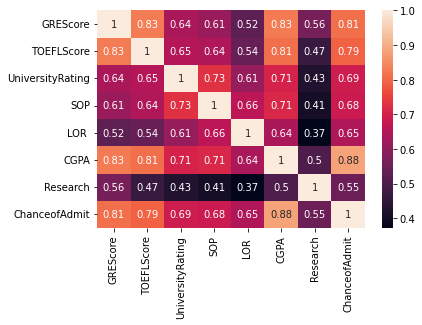

In [5]:
sns.heatmap(df.corr(),annot=True)

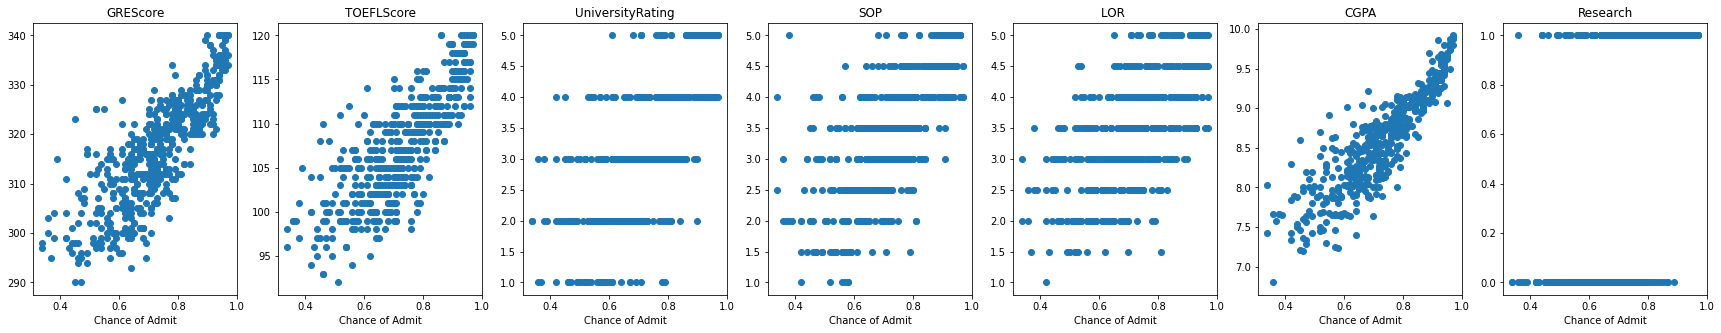

In [6]:
columns = list(df.columns)
columns.remove("ChanceofAdmit")

fig, ax = plt.subplots(1, len(columns), figsize = (30, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(df['ChanceofAdmit'], df[col], 'o')
    ax[idx].set_xlabel('Chance of Admit')
    ax[idx].set_title(col)

plt.show()

In [7]:
df.drop(['UniversityRating'], inplace=True, axis=1)
df.drop(['SOP'], inplace=True, axis=1)
df.drop(['LOR '], inplace=True, axis=1)

,GREScore,TOEFLScore,CGPA,Research,ChanceofAdmit
0,337,118,9.65,1,0.92
1,324,107,8.87,1,0.76
2,316,104,8.00,1,0.72
3,322,110,8.67,1,0.80
4,314,103,8.21,0,0.65
...,...,...,...,...,...
495,332,108,9.02,1,0.87
496,337,117,9.87,1,0.96
497,330,120,9.56,1,0.93
498,312,103,8.43,0,0.73


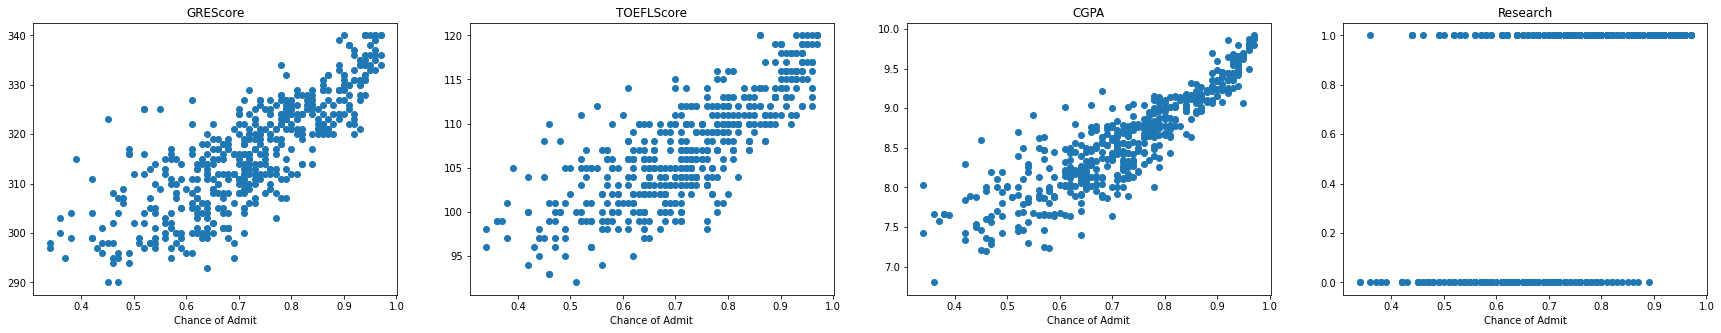

In [8]:
columns = list(df.columns)
columns.remove('ChanceofAdmit')

fig, ax = plt.subplots(1, len(columns), figsize = (30, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(df['ChanceofAdmit'], df[col], 'o')
    ax[idx].set_xlabel('Chance of Admit')
    ax[idx].set_title(col)

plt.show()

In [9]:
scaler = StandardScaler()
df[['GREScore', 'TOEFLScore', 'CGPA']] = scaler.fit_transform(df[['GREScore', 'TOEFLScore', 'CGPA']])

,GREScore,TOEFLScore,CGPA,Research,ChanceofAdmit
0,1.819238,1.778865,1.776806,1,0.92
1,0.667148,-0.031601,0.485859,1,0.76
2,-0.041830,-0.525364,-0.954043,1,0.72
3,0.489904,0.462163,0.154847,1,0.80
4,-0.219074,-0.689952,-0.606480,0,0.65
...,...,...,...,...,...
495,1.376126,0.132987,0.734118,1,0.87
496,1.819238,1.614278,2.140919,1,0.96
497,1.198882,2.108041,1.627851,1,0.93
498,-0.396319,-0.689952,-0.242367,0,0.73


In [10]:
X = df.drop('ChanceofAdmit', axis =1)
y = df['ChanceofAdmit']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 65 )

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.872465484227961

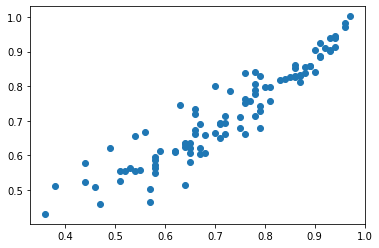

In [14]:
plt.scatter(y_test,y_pred)